## Exercise 1. Support Vector Machine 
1. Load the ‘load_breast_cancer’ dataset from sklearn.datasets. Rename the dataset ‘cancer_data.’ 
2. Explore the data. Look at the shape of the ‘cancer_data.’ 
3. Create a test and train set. The test set represents 40% of the total dataset. 
4. Import the ‘SVM’ module from sklearn to create a support vector classifier in svc() by passing the argument kernel as the linear kernel. Name the classifier ‘cls.’ 
5. Evaluate the model by providing separately the accuracy, precision, recall, and the classification report. What are your conclusions?
6. Using kernel=’rbf’, C=[0.1,1, 100], ‘epsilon’=[0.1,0.5,1] and gamma=[1,3,5], what are the best parameters? 
7. What does C, epsilon, and gamma represent? What happens if you reduce gamma? 

# solution

> * Load the ‘load_breast_cancer’ dataset from sklearn.datasets. Rename the dataset ‘cancer_data.

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy
import pandas
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import SVR
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
cancer_data = load_breast_cancer()
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

> * Explore the data. Look at the shape of the ‘cancer_data.’

In [4]:
print(cancer_data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
cancer_data.data.shape

(569, 30)

> * create a test and train set. The test set represents 40% of the total dataset.

In [7]:
xt = cancer_data['data']
yt = cancer_data['target']

In [8]:
xt_train,xt_test,yt_train,yt_test=train_test_split(xt,yt,test_size=0.4, random_state=2)

> * Import the ‘SVM’ module from sklearn to create a support vector classifier in svc() by passing the argument kernel as the linear kernel. Name the classifier ‘cls.’

In [9]:
cls = SVC(kernel='linear')

In [10]:
cls.fit(xt_train,yt_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
yt_predict = cls.predict(xt_test)

> * Evaluate the model by providing separately the accuracy, precision, recall, and the classification report. What are your conclusions?

In [12]:
print("Accuracy:",metrics.accuracy_score(yt_test, yt_predict))
print("precision:",metrics.precision_score(yt_test, yt_predict))
print("Recall score:",metrics.recall_score(yt_test, yt_predict))
print("classification_report :")
print(classification_report(yt_test,yt_predict))

Accuracy: 0.9429824561403509
precision: 0.9379310344827586
Recall score: 0.9714285714285714
classification_report :
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        88
           1       0.94      0.97      0.95       140

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228



### Conclusions: 

Accuracy : It is the ratio of correctly predicted observations to total number of observations. The Model is 94.3% accurate which is good.

precision : Precesion is slighly similar to Accuracy, the model is 93.7% which is good and dependable.

Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class. we got 97% recall score which is good and reliable.



In [13]:
svc = SVR(kernel='rbf',gamma=1, C=0.1,cache_size=500,epsilon=0.1)
svc.fit(xt_train, yt_train)

SVR(C=0.1, cache_size=500, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

> * Using kernel=’rbf’, C=[0.1,1, 100], ‘epsilon’=[0.1,0.5,1] and gamma=[1,3,5], what are the best parameters?

In [14]:
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={'C': [0.1,1, 100],'epsilon': [0.1,0.5,1],'gamma': [1,3,5]},
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
gsc.fit(xt_train, yt_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 100], 'epsilon': [0.1, 0.5, 1],
                         'gamma': [1, 3, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [15]:
print(gsc.best_params_)

{'C': 1, 'epsilon': 0.1, 'gamma': 1}


> * What does C, epsilon, and gamma represent? What happens if you reduce gamma?

C and Gamma are the parameters for a nonlinear support vector machine (SVM) with a Gaussian radial basis function kernel.

Low gamma signifies that gaussian has gvery large variance 

## Exercise 2. Naïve Bayes [10 points] 

1. Load the ‘iris’ dataset from sklearn.datasets. 
2. Define the feature matrix X and the target vector y. 
3. Split X and y into the training and test sets. Use 40% for the test set. 
4. Use the training set to train the Naïve Bayes model using GaussianNB. 
5. Make predictions using the test set. 
6. Compare actual target values (y_test) with predicted target values (y_pred) in percent. 
7. What are your conclusions? 
8. What are the other types of Naïve Bayes classifiers? 

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split

> * Load the ‘iris’ dataset from sklearn.datasets

In [17]:
iris1=datasets.load_iris()
iris1

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [18]:
iris = sns.load_dataset("iris")

In [19]:
print(iris1.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


> * Define the feature matrix X and the target vector y.

In [21]:
#feature
xi = iris.drop('species', axis=1)
print(xi.shape)
#target
yi = iris['species']
print(yi.shape)

(150, 4)
(150,)


> * Split X and y into the training and test sets. Use 40% for the test set.


In [22]:
xi_train,xi_test,yi_train,yi_test=train_test_split(xi,yi,test_size=0.4, random_state=2)
xi_train.head()

,sepal_length,sepal_width,petal_length,petal_width
30,4.8,3.1,1.6,0.2
101,5.8,2.7,5.1,1.9
99,5.7,2.8,4.1,1.3
59,5.2,2.7,3.9,1.4
135,7.7,3.0,6.1,2.3


In [23]:
xi_train.shape

(90, 4)

> * Use the training set to train the Naïve Bayes model using GaussianNB.

In [24]:
gnb = GaussianNB()
gnb.fit(xi_train, yi_train)

GaussianNB(priors=None, var_smoothing=1e-09)

> * Make predictions using the test set.

In [25]:
yi_pred = gnb.predict(xi_test)

> * Compare actual target values (y_test) with predicted target values (y_pred) in percent.

In [26]:
print("Accuracy:",(metrics.accuracy_score(yi_test, yi_pred)*100),"%")

Accuracy: 93.33333333333333 %


> * What are your conclusions?

the model is 93.3% accurate
Naive Bayes algorithms are mostly used in sentiment analysis, spam filtering, recommendation systems etc. They are fast and easy to implement but their biggest disadvantage is that the requirement of predictors to be independent. In most of the real life cases, the predictors are dependent, this hinders the performance of the classifier.

#citation : https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

> * What are the other types of Naïve Bayes classifiers?

There are three types of Naive Bayes model under the scikit-learn library:

* Gaussian: It is used in classification and it assumes that features follow a normal distribution.

* Multinomial: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

* Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

Citation: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

## Exercise 3. Logistic Regression [20 points] 
1. When does logistic regression become a classification technique?
2. Based on the number of categories, what are the different types of logistic regression models? 
3. From sklearn,  import datasets, linear_model, and metrics. 
4. Use the ‘load_digits’ dataset from sklearn. 
5. Set X as digits.data and y as digits.target
6. Split X and y into training and test sets. Use 40% of the data for the test set.
7. Create the logistic regression object as ‘reg.’ 
8. Make predictions using the test set. 
9. Compare actual response values (y_test) with the predicted response values (y_pred). What is the outcome? 

> * When does logistic regression become a classification technique?

Logistic regression becomes a classification technique only when a decision threshold is brought into the picture. The setting of the threshold value is a very important aspect of Logistic regression and is dependent on the classification problem itself.

#citation: https://www.geeksforgeeks.org/understanding-logistic-regression/

> * Based on the number of categories, what are the different types of logistic regression models?

There are three main types of logistic regression:

binomial: target variable can have only 2 possible types: 0 or 1 which may represent win vs loss, pass vs fail, dead vs alive, etc.

multinomial: target variable can have 3 or more possible types which are not ordered types have no quantitative significance like disease A vs disease B vs disease C.

ordinal: it deals with target variables with ordered categories. For example, a test score can be categorized as:very poor, poor, good, very good. Here, each category can be given a score like 0, 1, 2, 3.

Citatioon: https://www.edureka.co/community/46062/different-types-of-logistic-regression

> * From sklearn, import datasets, linear_model, and metrics.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.svm import SVR
import sklearn.metrics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)


sklearn: 0.21.2


> * Use the ‘load_digits’ dataset from sklearn.

In [28]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [29]:
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


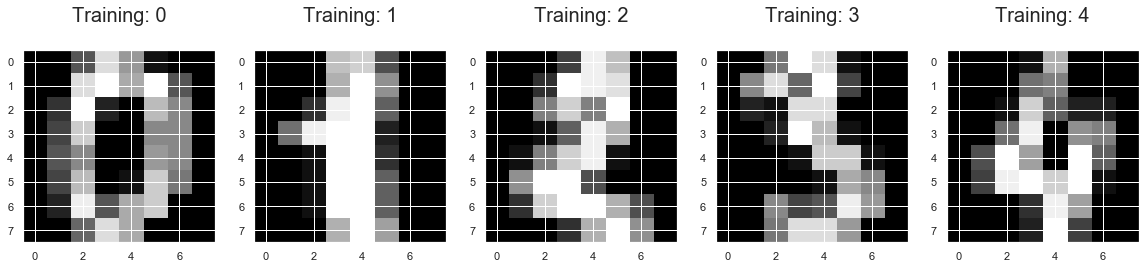

In [30]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

> * Set X as digits.data and y as digits.target
> * Split X and y into training and test sets. Use 40% of the data for the test set.

In [31]:
X = digits.data
y = digits.target
x1_train, x1_test, y1_train, y1_test = train_test_split(X,y , test_size=0.4, random_state=2)

> *  Create the logistic regression object as ‘reg.’ 

In [32]:
reg = LogisticRegression(solver='liblinear')

In [33]:
reg.fit(x1_train, y1_train)

C:\Users\pushy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# Fit the classifier to the training data
reg.fit(x1_train, y1_train)

C:\Users\pushy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y1_pred = reg.predict(x1_test)
print("Accuracy:",(metrics.accuracy_score(y1_test, y1_pred)))

Accuracy: 0.9388038942976356


> * Make predictions using the test set.
> * Compare actual response values (y_test) with the predicted response values (y_pred). What is the outcome?

Text(30.5, 0.5, 'Actual')

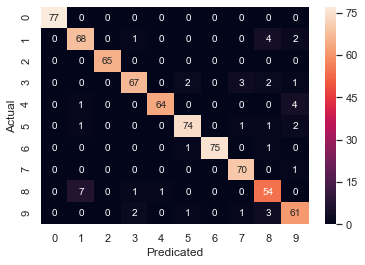

In [36]:
cmatrix=metrics.confusion_matrix(y1_test,y1_pred)
sns.heatmap(cmatrix, annot=True )
plt.xlabel("Predicated")
plt.ylabel("Actual")

In [37]:
score = reg.score(x1_test, y1_test)
score

0.9388038942976356

In [38]:
pred = reg.predict(x1_test)

In [39]:
import pandas as pd
pred_results = pd.DataFrame({'Actual':y1_test.flatten(), 'predicted':pred.flatten()})
pred_results

,Actual,predicted
0,4,4
1,0,0
2,9,9
3,1,1
4,4,9
5,7,7
6,1,1
7,5,5
8,1,1
9,6,6


Text(0.5, 1.0, 'comparing actual and predicted')

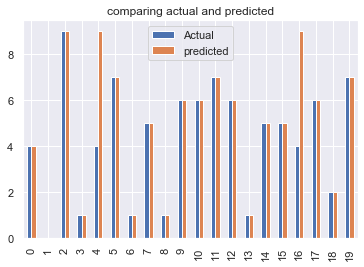

In [40]:
pred_results= pred_results.head(20)
pred_results.plot(kind='bar')
plt.title("comparing actual and predicted")

Exercise 4. Regression Models [40 points] 
1. Use the ‘diamonds.csv’ dataset from the Data File folder in Blackboard. 
2. Import the ‘pandas’, ‘numpy’, ‘seaborn’, ‘train_test_split’, ‘GridSearchCV’, ‘linear_model’, ‘Ridge’, ‘Lasso’, ‘RandomForestRegression’, ‘StandardScaler’, and ‘mean_squared_error’, among other packages. 
3. Represent the variables as catplots in seaborn. What is issue? What should you do to make sure you can properly evaluate the impact of each variable on the target? 
4. Drop the ‘Unnamed:0’ column, check the dataset for null values, provide the dataset info, and shape of target and feature variables. Make sure there are not any null values. If so, eliminate them. 
5. Once null values are removed, uses the ‘missingno’ library to visualize missing data. What are your conclusions? 
6. Describe the data. Make sure there are no rows for the x, y, and z variables with a zero value. If there are, remove them. 

7. Provide a correlation heatmap. What are your conclusions? Explain in a few words what correlation measures. How can correlation affect conclusions about the relationship between two or more variables in regression analysis? 
8. Use LabelEncoder to create three labels: ‘cut’, ‘color’, and ‘clarity.’ 
9. Define y as ‘price’ and create a train and test set. The test set represents 20% of the data.
10. Scale the train and test sets using ‘StandardScaler.’
11. Collect the R2_score as R2_Scores = [ ]  and the models as  models = ['Linear Regression' , 'Lasso Regression' , 'Ridge Regression' , 'Rando mForest Regression'] .  
12. Run a linear regression model. Provide the accuracy scores (remember: cv=5). Determine the MSE, MAE, RMSE, and r2_score for the y_test and y_pred model. Is the model over- or underfitting? Explain.  
13. What is the purpose of cross validation?  
14. Repeat question 12 for the Lasso model. 
15. Repeat question 12  for the Ridge Regression model. 
16. Repeat question 12  for the Random Forest Regression model.  
17. Using GridSearchCV such that   no_of_test=[100] params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']} determine the R2_score. Are the outcomes different from the model outcomes in question 16?  
18. Provide a table (DataFrame) that compares the R2_Scores from the different models using a data frame. How do you interpret the coefficient of determination? What does it represent?  
19. Create a bar plot to show the R2_Scores by model.
20. How do you think the linear regression model performed?
21. Did penalized models perform better than others? Explain the logic behind Ridge and Lasso regression. When do you best use Lasso versus Ridge regression? 

> * 1. Use the ‘diamonds.csv’ dataset from the Data File folder in Blackboard. 
> * 2. Import the ‘pandas’, ‘numpy’, ‘seaborn’, ‘train_test_split’, ‘GridSearchCV’, ‘linear_model’, ‘Ridge’, ‘Lasso’, ‘RandomForestRegression’, ‘StandardScaler’, and ‘mean_squared_error’, among other packages. 

In [41]:
#Import the ‘pandas’, ‘numpy’, ‘seaborn’, ‘train_test_split’, ‘GridSearchCV’, ‘linear_model’, ‘Ridge’, ‘Lasso’, ‘RandomForestRegression’, ‘StandardScaler’, and ‘mean_squared_error’, among other packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import numpy as np
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import warnings
from sklearn import metrics
import sklearn.metrics
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [42]:
#installing missing
!pip install missingno

In [43]:
data_diamond = pd.read_csv("diamonds.csv")
data_diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
data_diamond.sample(6)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
26168,26169,2.14,Premium,I,SI1,59.5,59.0,15499,8.42,8.36,4.99
27179,27180,2.51,Premium,J,SI1,59.6,60.0,17452,8.84,8.79,5.25
2715,2716,0.33,Ideal,H,SI1,60.6,56.0,564,4.46,4.49,2.72
9416,9417,1.01,Very Good,G,SI1,62.9,54.0,4588,6.41,6.47,4.05
37596,37597,0.24,Very Good,E,VVS2,59.7,60.0,485,4.08,4.10,2.44
20743,20744,1.53,Ideal,I,SI1,62.4,57.0,8981,7.33,7.37,4.59


In [45]:
data_diamond.shape

(53940, 11)

> * 3. Represent the variables as catplots in seaborn. What is issue? What should you do to make sure you can properly evaluate the impact of each variable on the target?

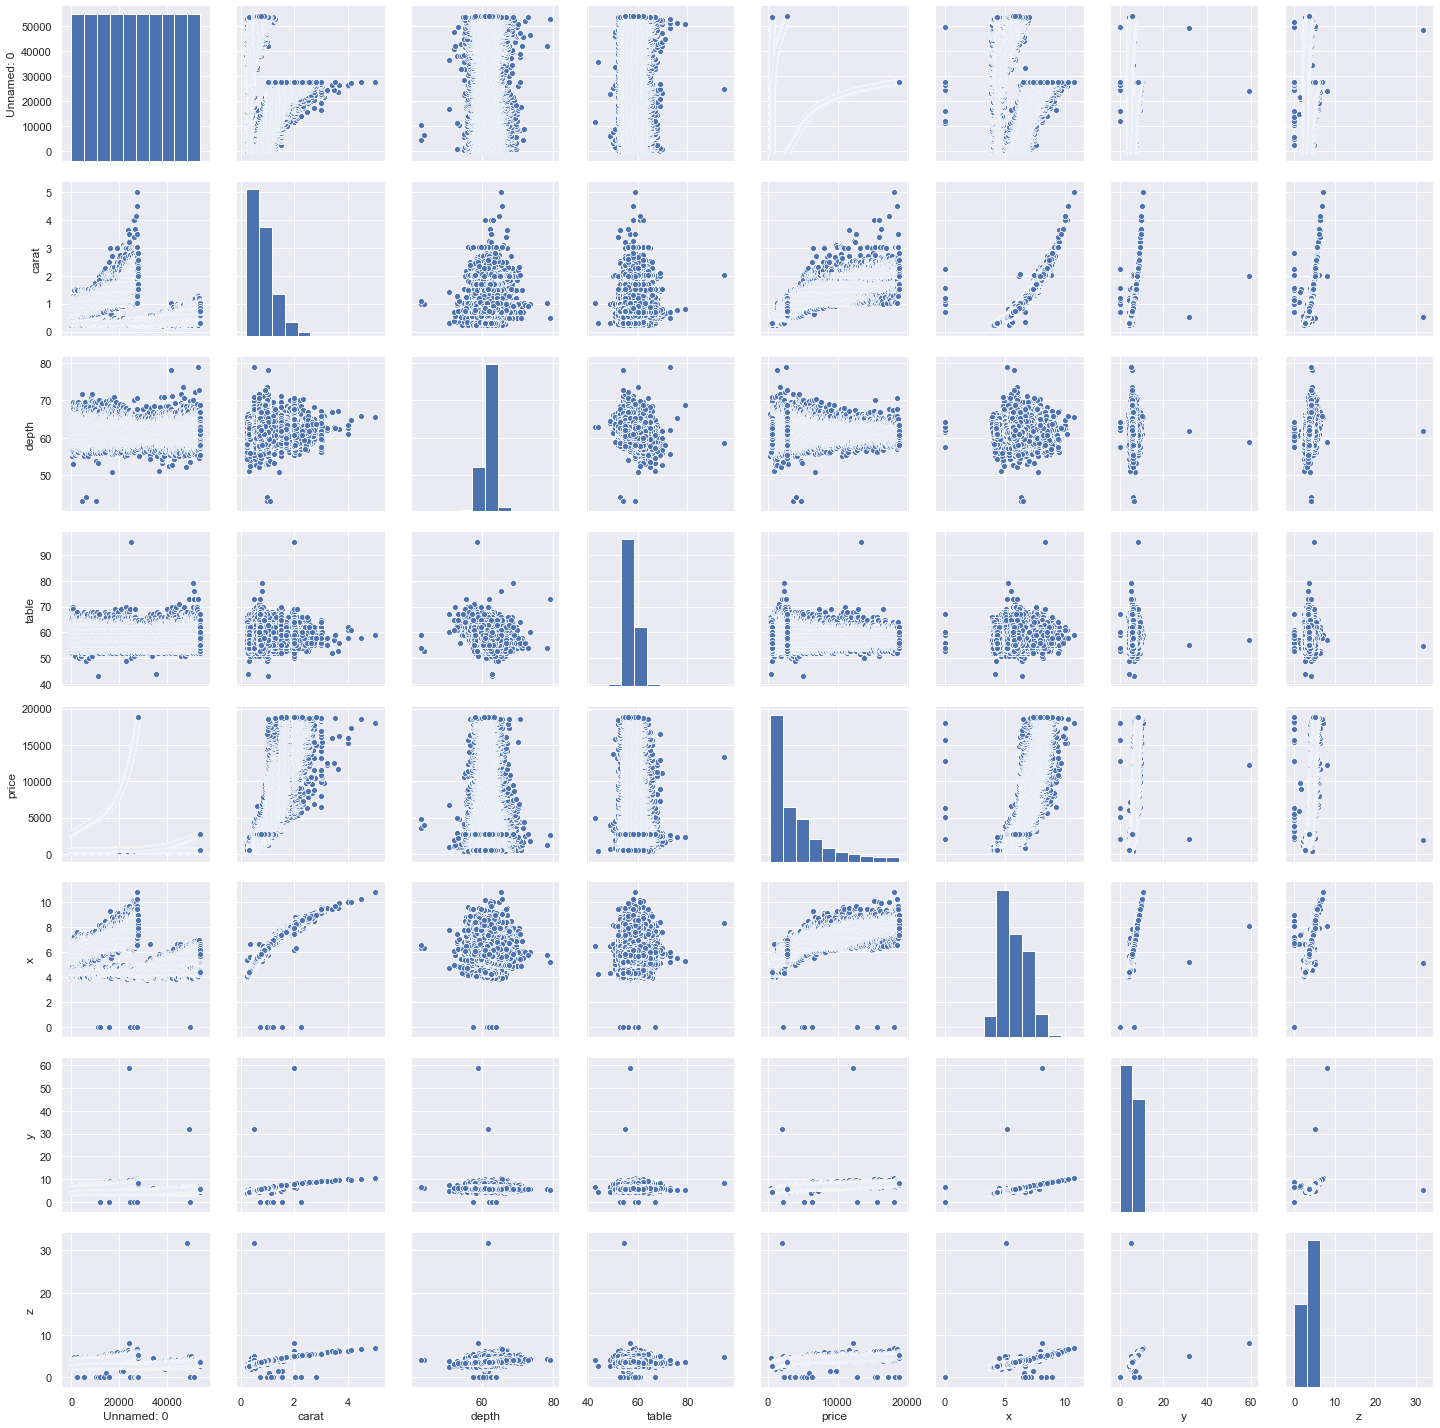

In [46]:
sns.pairplot(data_diamond)

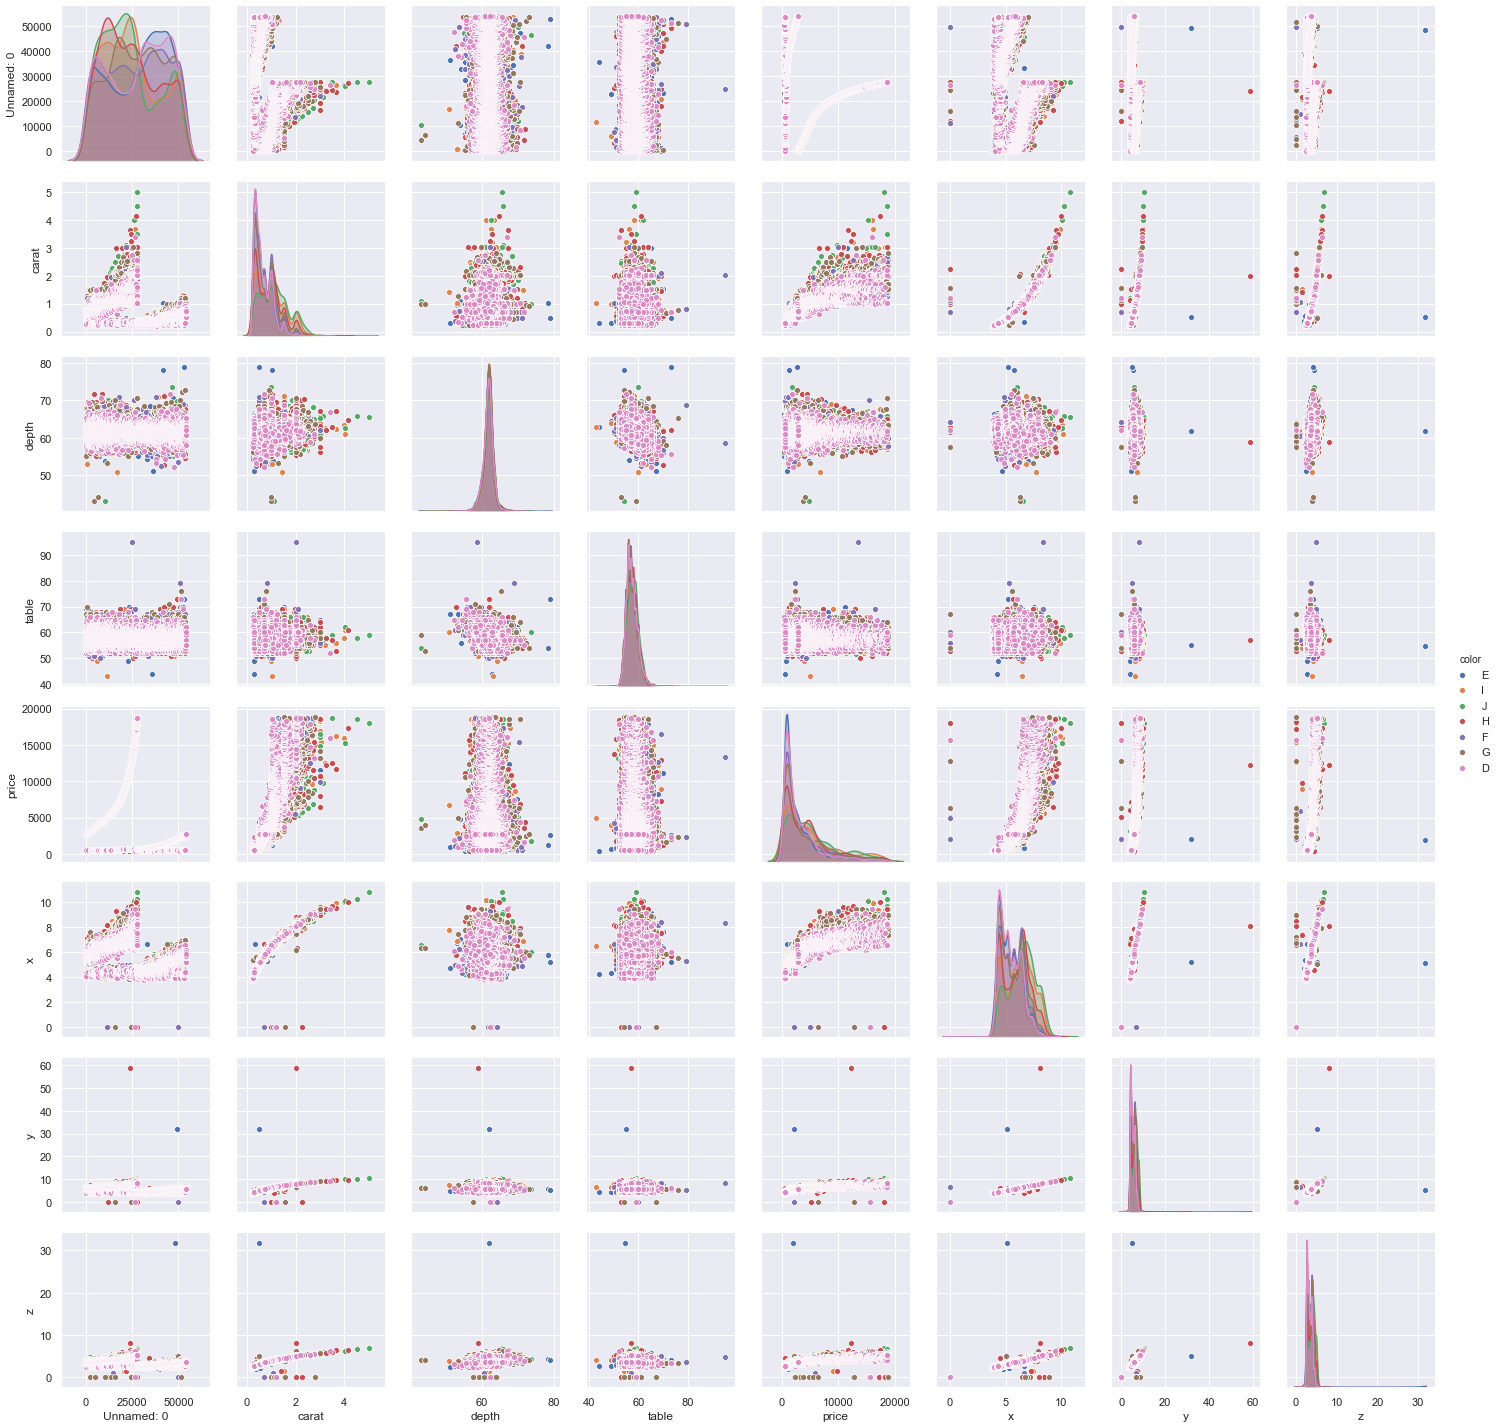

In [47]:
sns.pairplot(data_diamond, hue="color")

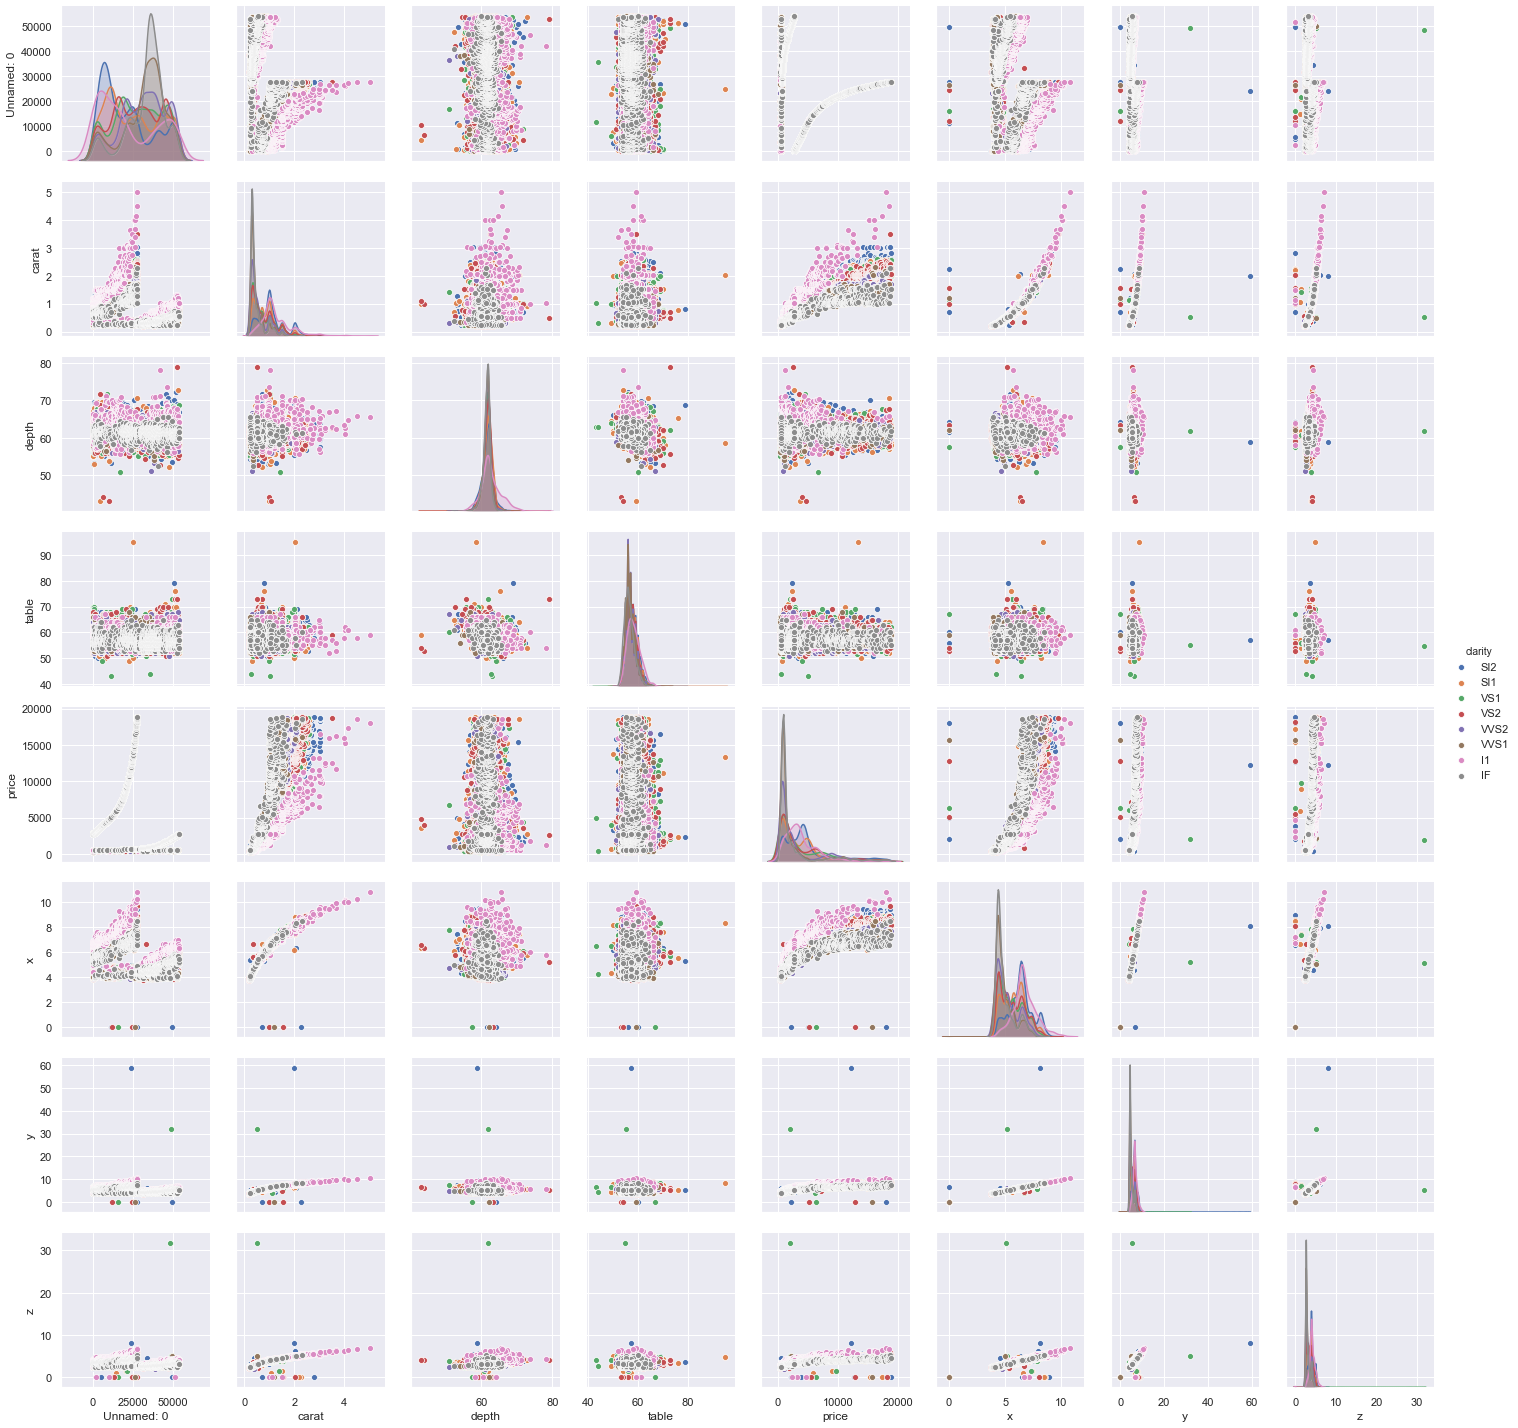

In [48]:
sns.pairplot(data_diamond, hue="clarity")

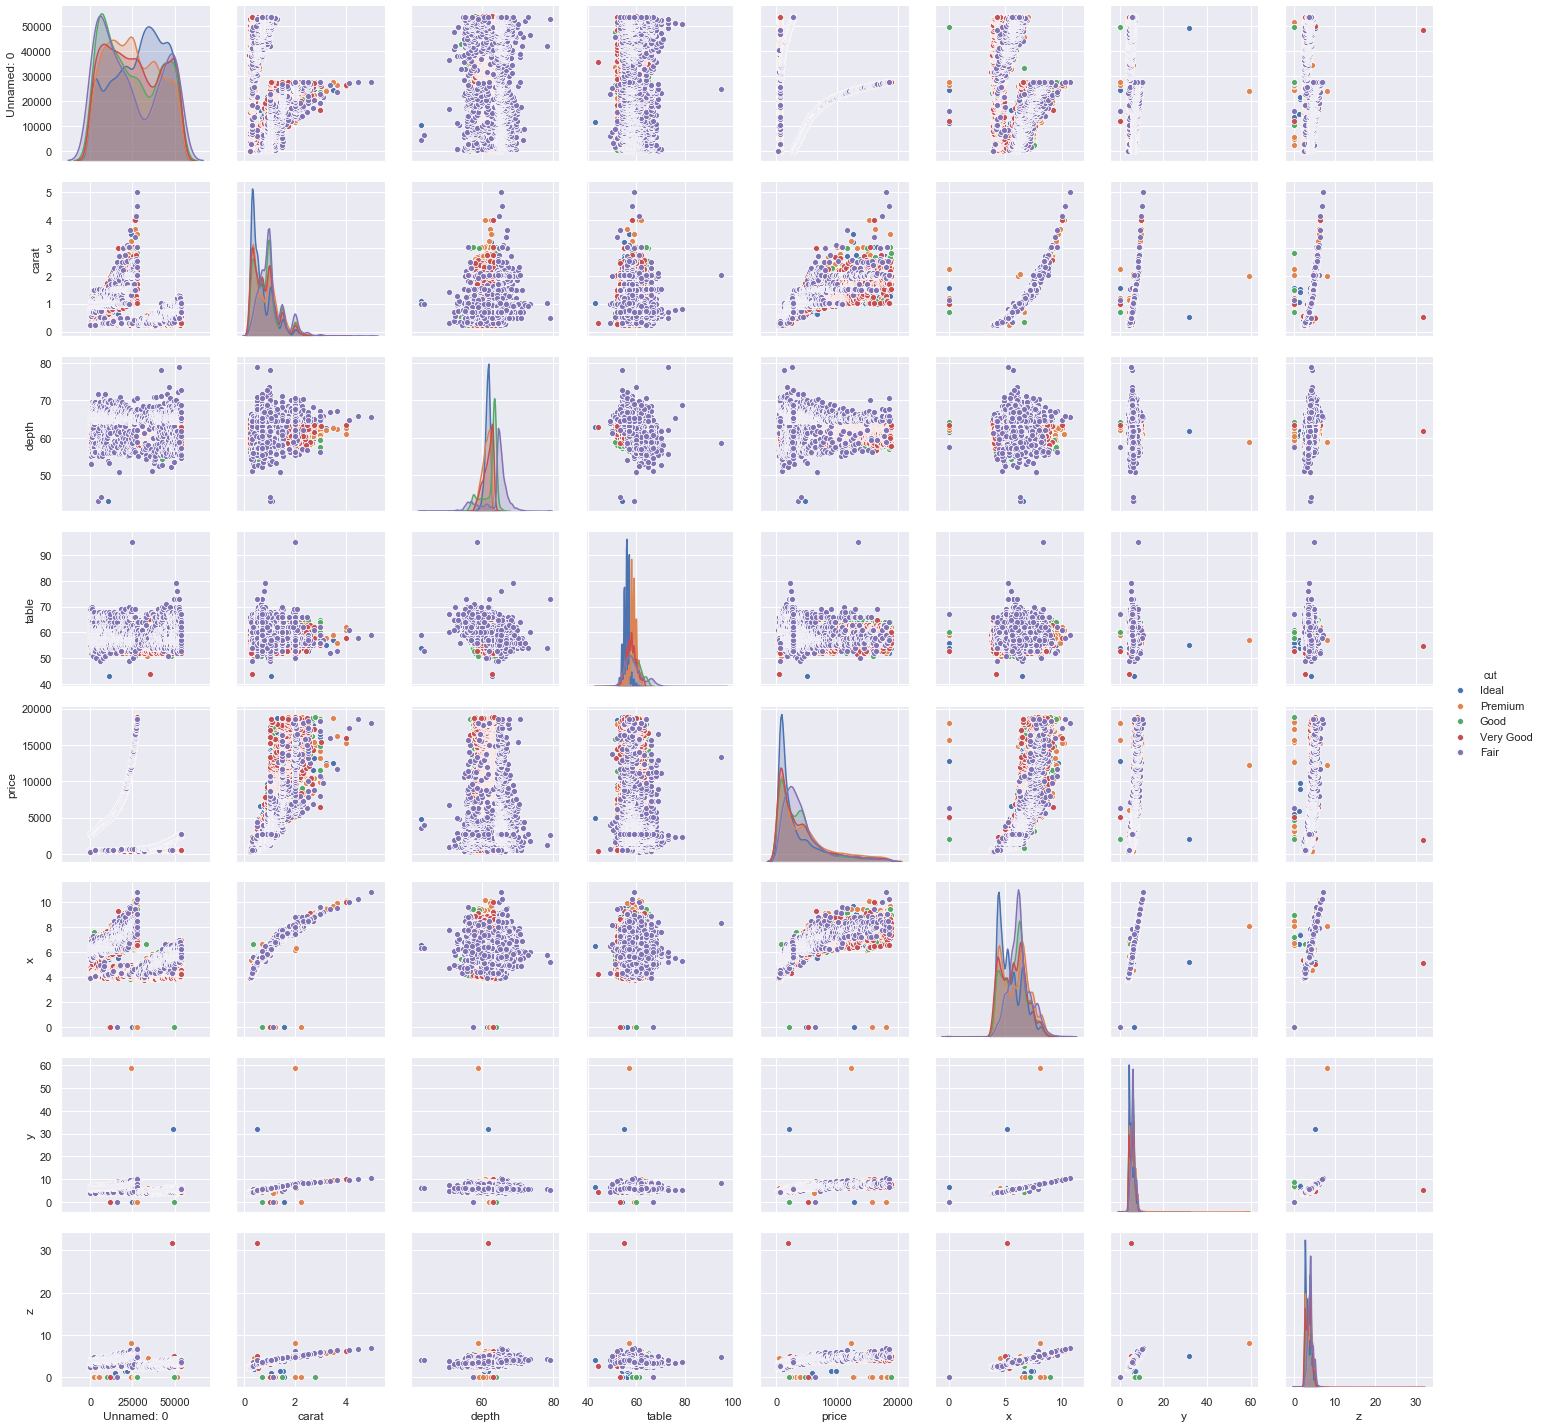

In [49]:
sns.pairplot(data_diamond, hue="cut")

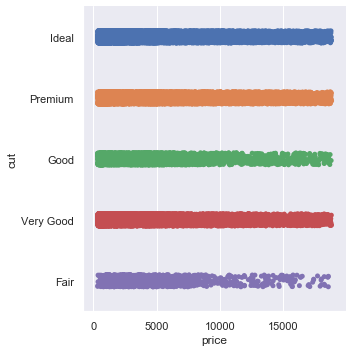

In [50]:
#plotting against price and each of the categorical values in the dataset cut, color, clarity
#cat plot against price and cut to understand the pricing distribution for different types of cuts
sns.catplot(x='price', y='cut', data=data_diamond)

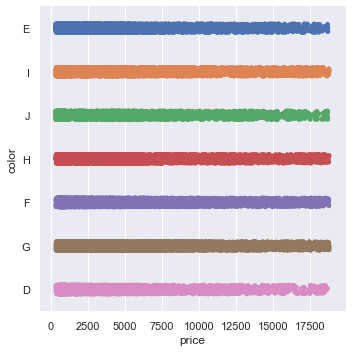

In [51]:
#cat plot against price and color to understand the pricing distribution for different colors
sns.catplot(x='price', y='color', data=data_diamond)

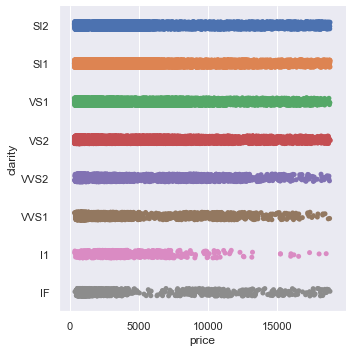

In [52]:
#cat plot against price and color to understand the pricing distribution for the different clarity of the diamond mentioned in the dataset.
sns.catplot(x='price', y='clarity', data=data_diamond)

cat plots are used for mainly categorical but not numerical

> * 4. Drop the ‘Unnamed:0’ column, check the dataset for null values, provide the dataset info, and shape of target and feature variables. Make sure there are not any null values. If so, eliminate them. 

In [53]:
d_diamond=data_diamond.drop('Unnamed: 0',axis=1)

In [54]:
d_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [55]:
d_diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> * Once null values are removed, uses the ‘missingno’ library to visualize missing data. What are your conclusions? 
> * Describe the data. Make sure there are no rows for the x, y, and z variables with a zero value. If there are, remove them. 
> * Provide a correlation heatmap. What are your conclusions? Explain in a few words what correlation measures. How can correlation affect conclusions about the relationship between two or more variables in regression analysis? 
> * Use LabelEncoder to create three labels: ‘cut’, ‘color’, and ‘clarity.’ 
> * Define y as ‘price’ and create a train and test set. The test set represents 20% of the data.
> * Scale the train and test sets using ‘StandardScaler.’

In [56]:
#shape of target and feature variables
X_diamond = d_diamond[['carat','cut','color','clarity','depth','table','x','y','z']]
y_diamond = d_diamond[['price']]

In [57]:
X_diamond.shape

(53940, 9)

In [58]:
y_diamond.shape

(53940, 1)

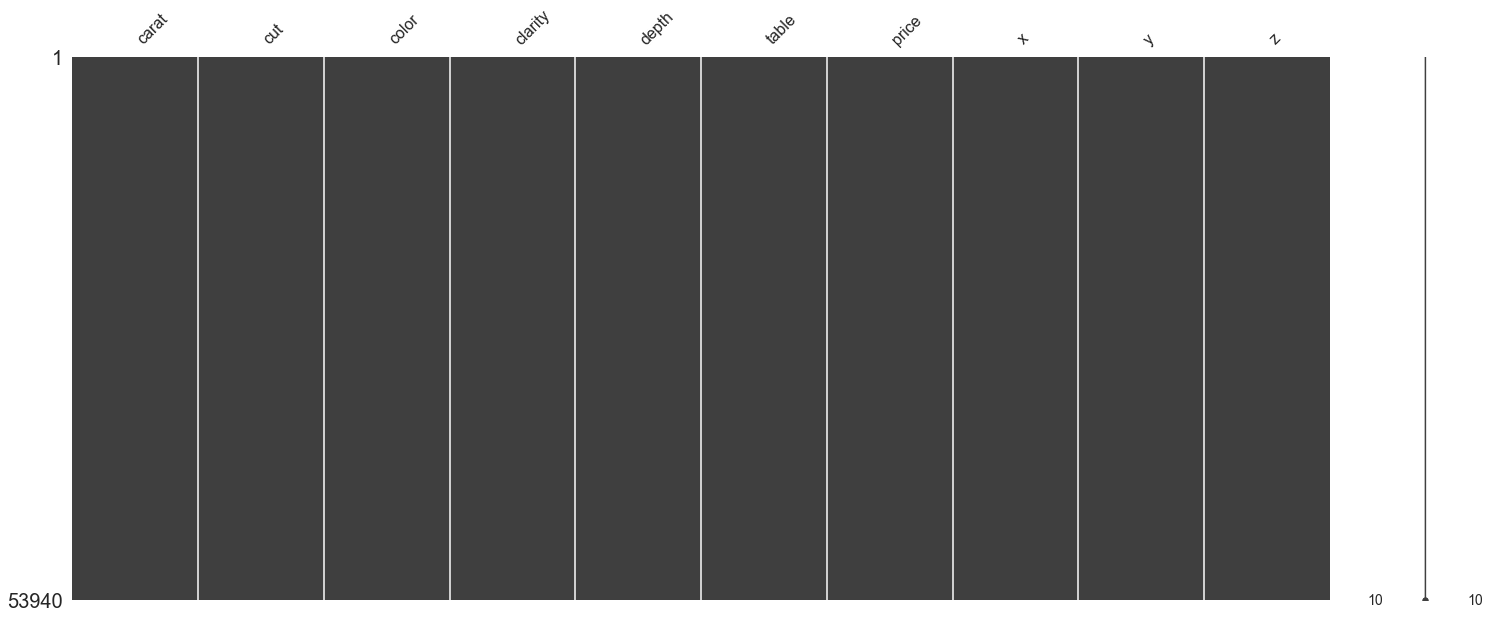

In [59]:
msno.matrix(d_diamond.isnull())

Conclusion : It can be said that there are no missing values by using missingno and after removing them and there are equal null values in each column and equal number of values in each column.

In [60]:
# Delete these row indexes from dataFrame
i1 = d_diamond[ d_diamond['x'] == 0 ].index
d_diamond.drop(i1 , inplace=True)



In [61]:
i2 = d_diamond[ d_diamond['y'] == 0 ].index
d_diamond.drop(i2 , inplace=True)

In [62]:
i3 = d_diamond[ d_diamond['z'] == 0 ].index
d_diamond.drop(i3 , inplace=True)

In [63]:
d_diamond.describe()


,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


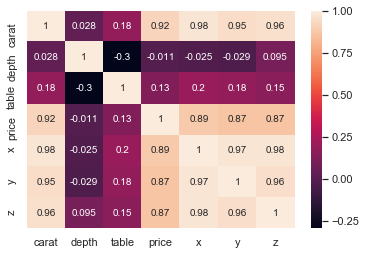

In [64]:
correlation = d_diamond.corr()
ax = sns.heatmap(correlation, annot=True)

Conclusion: Here when you compare the depth and price are negatively corelated, but the price is positively corelated with the carat. So i can say that price positively increases with the increase in the carat.

Correlation coefficients are measures of association between two (or more) variables. Correlation is a measure of association that tests whether a relationship exists between two variables. It indicates both the strength of the association and its direction. This only applies for numerical values.
#citation: https://web.csulb.edu/~msaintg/ppa696/696corrl.htm

In [65]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 

In [66]:
label_encoder = preprocessing.LabelEncoder()

In [67]:
d_diamond['cut']=label_encoder.fit_transform(d_diamond['cut'])
d_diamond['color']=label_encoder.fit_transform(d_diamond['color'])
d_diamond['clarity']=label_encoder.fit_transform(d_diamond['clarity'])

In [68]:
X_diamond = d_diamond[['carat','cut','color','clarity','depth','table','x','y','z']]
y_diamond = d_diamond[['price']]

In [69]:
X_diamond_train,X_diamond_test,y_diamond_train, y_diamond_test = train_test_split(X_diamond, y_diamond, test_size=0.2 , random_state=2)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc = StandardScaler()

In [72]:
sc.fit(X_diamond_train)
sc.fit(y_diamond_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
sc.fit(X_diamond_test)
sc.fit(y_diamond_test )

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
X_diamond_train_std = sc.transform(X_diamond_train)
y_diamond_train_std = sc.transform(y_diamond_train)

In [75]:
X_diamond_test_std = sc.transform(X_diamond_test)
y_diamond_test_std = sc.transform(y_diamond_test)

In [76]:
standardise = pd.DataFrame(sc.fit_transform(d_diamond[['carat','depth','table','x','y','z']]),columns = ['carat','depth','table','x','y','z'],index=d_diamond.index)
standardise

,carat,depth,table,x,y,z
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583
5,-1.177098,0.733417,-0.204488,-1.600506,-1.556761,-1.508912
6,-1.177098,0.384332,-0.204488,-1.591573,-1.539219,-1.523146
7,-1.134885,0.105065,-1.099725,-1.484374,-1.425195,-1.437740
8,-1.219311,2.339206,1.585988,-1.663039,-1.714640,-1.494677
9,-1.198204,-1.640358,1.585988,-1.546907,-1.477822,-1.637021


> * 11. Collect the R2_score as R2_Scores = [ ]  and the models as  models = ['Linear Regression' , 'Lasso Regression' , 'Ridge Regression' , 'Rando mForest Regression'] . 

In [77]:
R2_scores =[]
models = ['Linear Regression' , 'Lasso Regression' , 'Ridge Regression' , 'RandomForest Regression']

> * 12. Run a linear regression model. Provide the accuracy scores (remember: cv=5). Determine the MSE, MAE, RMSE, and r2_score for the y_test and y_pred model. Is the model over- or underfitting? Explain. 

In [78]:
lmodel = linear_model.LinearRegression()

In [79]:
lmodel.fit(X_diamond_train,y_diamond_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
pred_diamond = lmodel.predict(X_diamond_test)

In [81]:
train_score=lmodel.score(X_diamond_train,y_diamond_train)
print("train_score",train_score)
test_score=lmodel.score(X_diamond_test,y_diamond_test)
print("test_score",test_score)

train_score 0.8850623188543617
test_score 0.887141629347753


The model is neither overfitting nor underfitting, as we can see the scores are almost equal for both train and test data so its neither overfitting nor underfitting.

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
R2_Scores=[]

In [84]:
mae = metrics.mean_absolute_error(y_diamond_test, pred_diamond)
mse = metrics.mean_squared_error(y_diamond_test, pred_diamond)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_diamond_test, pred_diamond)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

R2_Scores.append(r2)
accuracy = cross_val_score(estimator=lmodel, X= X_diamond_train,y = y_diamond_train, cv=5, verbose= 1 )
print("accuracy",accuracy)

Results of sklearn.metrics:
MAE: 852.7260606138731
MSE: 1762945.3923102461
RMSE: 1327.7595385875584
R-Squared: 0.8871416293477529
accuracy [0.88572399 0.89376351 0.86213873 0.87970758 0.88425584]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [85]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

> * 13. What is the purpose of cross validation?  

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. Means to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

#citation: https://machinelearningmastery.com/k-fold-cross-validation/

> * 14. Repeat question 12 for the Lasso model. 

In [86]:
from sklearn.linear_model import Lasso

In [87]:
lasso = Lasso()
lasso.fit(X_diamond_train,y_diamond_train)
train_score=lasso.score(X_diamond_train,y_diamond_train)
print("train_score",train_score)
test_score=lasso.score(X_diamond_test,y_diamond_test)
print("test_score",test_score)
accuracy = cross_val_score(estimator=lasso, X= X_diamond_train,y = y_diamond_train, cv=5, verbose= 1 )
print("accuracy",accuracy)


train_score 0.8850437078773703
test_score 0.8870488534951286


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy [0.88560001 0.89358389 0.87352021 0.87961883 0.88429325]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [88]:
lass_pred = lasso.predict(X_diamond_test)
mae = metrics.mean_absolute_error(y_diamond_test, lass_pred)
mse = metrics.mean_squared_error(y_diamond_test, lass_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_diamond_test, lass_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
R2_Scores.append(r2)

Results of sklearn.metrics:
MAE: 854.7050169445314
MSE: 1764394.6313959789
RMSE: 1328.3051725397966
R-Squared: 0.8870488534951287


> * 15. Repeat question 12  for the Ridge Regression model. 

In [89]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_diamond_train,y_diamond_train)
train_score=ridge.score(X_diamond_train,y_diamond_train)
print("train_score",train_score)
test_score=ridge.score(X_diamond_test,y_diamond_test)
print("test_score",test_score)
accuracy = cross_val_score(estimator=ridge, X= X_diamond_train,y = y_diamond_train, cv=5, verbose= 1 )
print("accuracy",accuracy)

train_score 0.8850618145527842
test_score 0.8871312336005918
accuracy [0.88570288 0.89372703 0.86316268 0.87969333 0.88427025]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [90]:
ridge_pred = ridge.predict(X_diamond_test)
mae = metrics.mean_absolute_error(y_diamond_test, ridge_pred)
mse = metrics.mean_squared_error(y_diamond_test, ridge_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_diamond_test, ridge_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
R2_Scores.append(r2)

Results of sklearn.metrics:
MAE: 853.0987618645081
MSE: 1763107.7828750857
RMSE: 1327.820689278144
R-Squared: 0.8871312336005919


> * 16. Repeat question 12  for the Random Forest Regression model. 

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [92]:
RandomF = RandomForestRegressor()
RandomF.fit(X_diamond_train,y_diamond_train)
train_score=RandomF.score(X_diamond_train,y_diamond_train)
print("train_score",train_score)
test_score=RandomF.score(X_diamond_test,y_diamond_test)
print("test_score",test_score)
accuracy = cross_val_score(estimator=RandomF, X= X_diamond_train,y = y_diamond_train, cv=5, verbose= 1 )
print("accuracy",accuracy)

train_score 0.9964052778297695
test_score 0.9793514166360917


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy [0.97848889 0.97877771 0.9798536  0.97972571 0.97988422]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.3s finished


In [93]:
RandomF_pred = RandomF.predict(X_diamond_test)
mae = metrics.mean_absolute_error(y_diamond_test, RandomF_pred)
mse = metrics.mean_squared_error(y_diamond_test, RandomF_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_diamond_test, RandomF_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
R2_Scores.append(r2)

Results of sklearn.metrics:
MAE: 285.53885478486643
MSE: 322548.73687042017
RMSE: 567.9337433807048
R-Squared: 0.9793514166360918


> * 17. Using GridSearchCV such that   no_of_test=[100] params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']} determine the R2_score. Are the outcomes different from the model outcomes in question 16?  

In [94]:
no_of_test = [100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
grid_search = GridSearchCV(estimator = RandomF, param_grid = params_dict, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_diamond_train,y_diamond_train)
print("score : " , grid_search.score(X_diamond_test,y_diamond_test))
pred_grid = grid_search.predict(X_diamond_test)
r2 = metrics.r2_score(y_diamond_test, pred_grid)
print("R-Squared:", r2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   19.6s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   20.4s finished


score :  0.9806465291370982
R-Squared: 0.9806465291370982


In [95]:
R2_Scores

[0.8871416293477529,
 0.8870488534951287,
 0.8871312336005919,
 0.9793514166360918]

> * 18. Provide a table (DataFrame) that compares the R2_Scores from the different models using a data frame. How do you interpret the coefficient of determination? What does it represent?  
> * 19. Create a bar plot to show the R2_Scores by model.

In [96]:
df_all = pd.DataFrame({'Models': models, 'R2_scores' : R2_Scores})
df_all

,Models,R2_scores
0,Linear Regression,0.887142
1,Lasso Regression,0.887049
2,Ridge Regression,0.887131
3,RandomForest Regression,0.979351


In [97]:
df_all.sort_values(by='R2_scores', ascending = False)

,Models,R2_scores
3,RandomForest Regression,0.979351
0,Linear Regression,0.887142
2,Ridge Regression,0.887131
1,Lasso Regression,0.887049


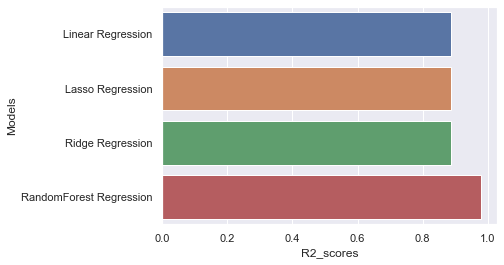

In [98]:
sns.barplot(x='R2_scores', y ='Models',data=df_all)

> * 20. How do you think the linear regression model performed?

The linear regression model performed well with an accuracy scores and r2 scores of 88.5 and 88.7 percents respectively.

> *  21. Did penalized models perform better than others? Explain the logic behind Ridge and Lasso regression. When do you best use Lasso versus Ridge regression? 

The penalized models i.e., the LASSO and the Ridge performed like linear regression model but poor than random forest.


Ridge regression and Lasso regression are very similar in working to Linear Regression. The only difference is the addition of the l1 penalty in Lasso Regression and the l2 penalty in Ridge Regression. The primary reason why these penalty terms are added is two ensure there is regularization, shrinking the weights of the model to zero or close to zero to ensure that the model does not overfit the data.
Overfitting is a problem that occurs when the regression model gets tuned to the training data too much that it does not generalize well. It is also called a model with high variance as the difference between the actual value and the predicted value of the dependent variable in the test set will be high.
Both of these techniques use an additional term called penalties in their cost function.

Citation : https://medium.com/analytics-vidhya/math-behind-linear-ridge-and-lasso-regression-b9de216ebdf8

## Exercise 5. Time Series
1. Load the required libraries (pandas, numpy, statsmodels.tsa.seasonal). 
2. Use the ‘air_passengers.csv’ file for this exercise from the ‘Data Files’ folder. Make sure that ‘index_col’ is ‘Month’ and ‘parse_dates’ is True. 
3. Use ‘ETS Decomposition’ to separate different components of a time series. 
4. What is the trend? Is there any seasonality? What are the other components of a time series? 
5. Provide the autocorrelation plot using ‘pandas.plotting.’ What information does an autocorrelation plot provide? 
6. Provide the residual plot. What does it say? Are the errors Gaussian and centered to zero or not? 
7. Provide  number of passengers for the predicted and expected values of passengers given the following parameters: def parser(x):     return datetime.strptime('190'+x, '%Y-%m') X = airline.values size = int(len(X) * 0.66) train, test = X[0:size], X[size:len(X)] history = [x for x in train] predictions = list() Use the ARIMA(2,1,2) and remember that the model fit is defined as: 
 model_fit = model.fit(disp=0) 
 What is the MSE for the test data? 
8. Plot test vs. prediction values. 

In [99]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


> * 1. Load the required libraries (pandas, numpy, statsmodels.tsa.seasonal). 
> * 2. Use the ‘air_passengers.csv’ file for this exercise from the ‘Data Files’ folder. Make sure that ‘index_col’ is ‘Month’ and ‘parse_dates’ is True.

In [101]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import statsmodels.tsa.seasonal
import sklearn.metrics
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
%matplotlib inline
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
d1 = pd.read_csv("air_passengers.csv", sep='\t', index_col='Month', parse_dates = True)
d1

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [103]:
d1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


> * Use ‘ETS Decomposition’ to separate different components of a time series.

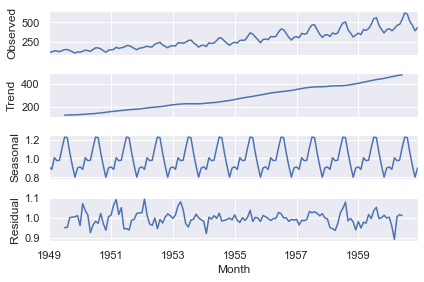

In [104]:
#ETS Decomposition
result = seasonal_decompose(d1['#Passengers'], model ='multiplicative') 
result
#ETS Plot 
result.plot()
plt.show()

> * What is the trend? Is there any seasonality? What are the other components of a time series?

- The trend is upward. There is a seasonality for defined intervals.

• Seasonal variations that repeat over a specific period such as a day, week, month, season, etc.

• Trend variations that move up or down in a reasonably predictable pattern

• Cyclical variations that correspond with business or economic 'boom-bust' cycles or follow their own peculiar
cycles

• Random variations that do not fall under any of the above three classifications

Citation : DATA 602 Lecture 3 

> * Provide the autocorrelation plot using ‘pandas.plotting.’ What information does an autocorrelation plot provide?

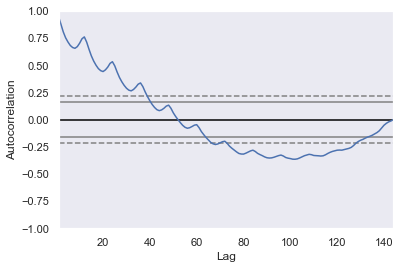

In [105]:
autocorrelation_plot(d1)
pyplot.show()

This plot shows lag on the x-axis and the correlation on the y-axis. 

Dotted lines indicate if there are any correlation values above those lines are significant or not.

it is positively corelated till a positive point and then there is a negative corelation occured.

> * Provide the residual plot. What does it say? Are the errors Gaussian and centered to zero or not?

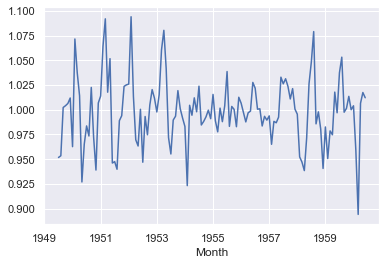

In [106]:
result.resid.plot()

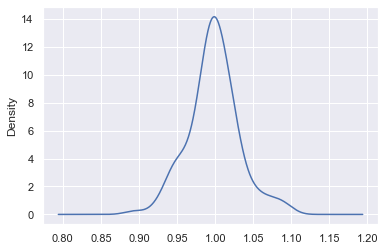

In [107]:
result.resid.plot(kind='kde')

The Gaussian errors arent centered to 0

> * Provide number of passengers for the predicted and expected values of passengers given the following parameters: def parser(x): return datetime.strptime('190'+x, '%Y-%m') X = airline.values size = int(len(X) * 0.66) train, test = X[0:size], X[size:len(X)] history = [x for x in train] predictions = list() Use the ARIMA(2,1,2) and remember that the model fit is defined as: model_fit = model.fit(disp=0) What is the MSE for the test data?

In [108]:
X = d1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)



predicted=273.192809, expected=306.000000
predicted=323.299761, expected=315.000000
predicted=343.624184, expected=301.000000
predicted=312.742940, expected=356.000000
predicted=369.701443, expected=348.000000
predicted=328.560641, expected=355.000000
predicted=366.861723, expected=422.000000
predicted=412.661078, expected=465.000000
predicted=444.618355, expected=467.000000
predicted=439.275268, expected=404.000000
predicted=372.178693, expected=347.000000
predicted=346.718187, expected=305.000000
predicted=291.934484, expected=336.000000
predicted=344.104079, expected=340.000000
predicted=362.244953, expected=318.000000
predicted=335.322267, expected=362.000000
predicted=380.574944, expected=348.000000
predicted=339.977922, expected=363.000000
predicted=385.826709, expected=435.000000
predicted=433.258622, expected=491.000000
predicted=478.354953, expected=505.000000
predicted=474.554519, expected=404.000000
predicted=367.686933, expected=359.000000
predicted=386.045667, expected=310

In [109]:
model = ARIMA(d1, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.715
Date:                Sun, 05 Apr 2020   AIC                           1344.043
Time:                        17:39:21   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5308      0.708      3.573      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.931      0.000       1.583       1.712
ar.L2.D.#Passeng

In [110]:

mse = metrics.mean_squared_error(test, predictions)
print("MSE for test data :",mse)

MSE for test data : 1607.5305684128796


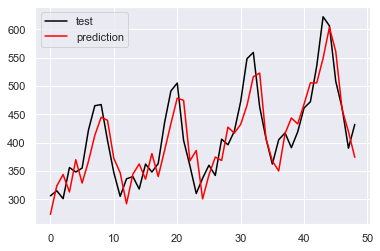

In [111]:
# plot
plt.plot(test, color='black')
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

## CITATIONS : 
https://github.com/DATA602/Class

https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-autocorrelation

https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/

https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html

https://stackoverflow.com/questions/24132237/scikit-learn-cross-validation-scoring-for-regression

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://machinelearningmastery.com/make-manual-predictions-arima-models-python/

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

https://analyticsindiamag.com/lasso-regression-in-python-with-machinehack-data-science-hackathon/

https://stackoverflow.com/questions/35896205/nameerror-name-ridge-is-not-defined

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://machinelearningmastery.com/make-manual-predictions-arima-models-python/

https://stackoverflow.com/questions/34457281/decomposing-trend-seasonal-and-residual-time-series-elements

https://stackoverflow.com/questions/40794282/value-error-in-python-statsmodels-tsa-seasonal

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html